# DiDの実装  
---

ライブラリのインポート

In [2]:
from sklearn.linear_model import LinearRegression
import causalpy as cp


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
df = cp.load_data('did')
df.head()

,group,t,unit,post_treatment,y
0,0,0.0,0,False,0.897122
1,0,1.0,0,True,1.961214
2,1,0.0,1,False,1.233525
3,1,1.0,1,True,2.752794
4,0,0.0,2,False,1.149207


C:\Users\Tsunc\AppData\Local\Temp\ipykernel_8276\2903849987.py:1: DeprecationWarning: cp.pymc_experiments.DifferenceInDifferences is deprecated and will be removed in a future release. Please use:
        import causalpy as cp
        cp.DifferenceInDifferences(...)
  result = cp.skl_experiments.DifferenceInDifferences(
C:\Users\Tsunc\AppData\Roaming\Python\Python312\site-packages\matplotlib\text.py:1467: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_yunits(y))
C:\Users\Tsunc\AppData\Roaming\Python\Python312\site-packages\matplotlib\text.py:1467: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(self.convert_y

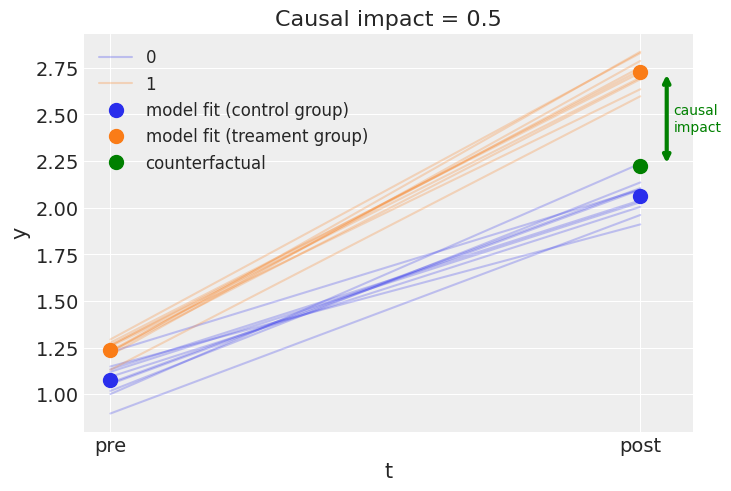

In [4]:
result = cp.skl_experiments.DifferenceInDifferences(
    df,
    formula="y ~ 1 + group*post_treatment",# モデルの式（yは目的変数、1は定数項を意味する）
    time_variable_name="t",# 時間変数の名前
    group_variable_name="group",# グループ変数（処置群か対照群かを示す変数）の名前
    treated=1,# 処置群を示す値
    untreated=0,# 対照群を示す値
    model=LinearRegression(),
)

fig, ax = result.plot();# 分析結果のプロット